In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.readwrite import json_graph

In [2]:
graph = nx.Graph()

In [3]:
graph.add_edges_from([(1, 2, {'tipo': 'hermano'}), (2, 3, {'tipo': 'hermano'}),
                      (1, 3, {'tipo': 'hermano'}), (1, 4, {'tipo': 'hermano'}),
                      (2, 4, {'tipo': 'hermano'}), (3, 4, {'tipo': 'hermano'})])

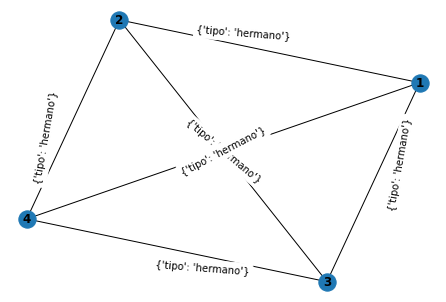

In [4]:
plt.figure()
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(graph, pos=pos)
plt.show()

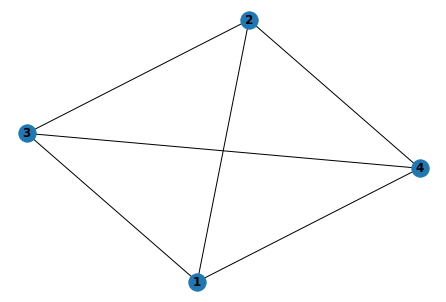

In [5]:
nx.draw(graph, with_labels=True, font_weight='bold')

Node: 1
Neighbors: [2, 3, 4]
Connections: [(1, 2, {'tipo': 'hermano'}), (1, 3, {'tipo': 'hermano'}), (1, 4, {'tipo': 'hermano'})]

Node: 2
Neighbors: [1, 3, 4]
Connections: [(2, 1, {'tipo': 'hermano'}), (2, 3, {'tipo': 'hermano'}), (2, 4, {'tipo': 'hermano'})]

Node: 3
Neighbors: [2, 1, 4]
Connections: [(3, 2, {'tipo': 'hermano'}), (3, 1, {'tipo': 'hermano'}), (3, 4, {'tipo': 'hermano'})]

Node: 4
Neighbors: [1, 2, 3]
Connections: [(4, 1, {'tipo': 'hermano'}), (4, 2, {'tipo': 'hermano'}), (4, 3, {'tipo': 'hermano'})]



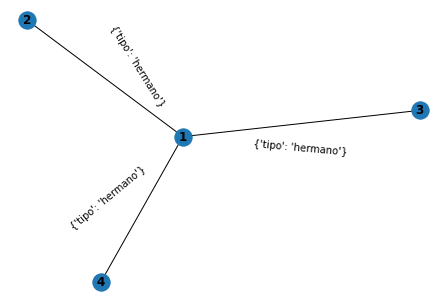

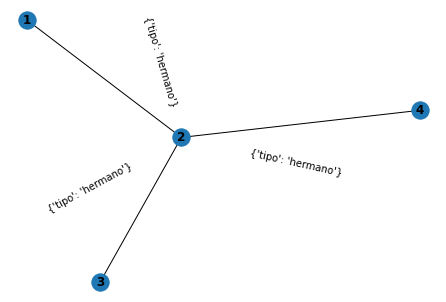

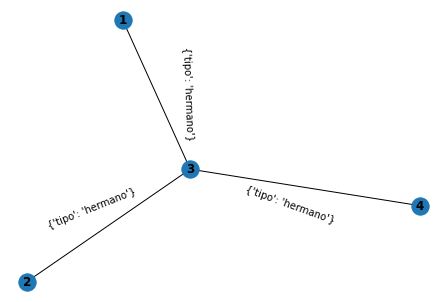

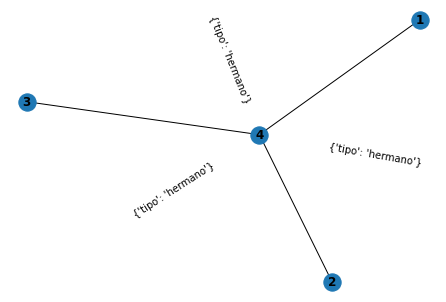

In [6]:
for node, neighbors in graph.adj.items():
    node_neighbors_graph = nx.Graph()
    edges_list = [(node, neighbor, relations) for neighbor, relations in neighbors.items()]
    node_neighbors_graph.add_edges_from(edges_list)
    print(f'Node: {node}')
    print(f'Neighbors: {list(neighbors.keys())}')
    print(f'Connections: {edges_list}')
    print()

    plt.figure()
    pos = nx.spring_layout(node_neighbors_graph)
    nx.draw(node_neighbors_graph, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(node_neighbors_graph, pos=pos)

plt.show()

In [7]:
def draw_node_neighbors(graph, node):
    if node not in graph:
        print(f'Node {node} does not exist.')
        return

    node_neighbors_graph = nx.Graph()
    edges_list = [(node, neighbor, relations) for neighbor, relations in graph[node].items()]
    node_neighbors_graph.add_edges_from(edges_list)

    print(f'Node: {node}')
    print(f'Connections: {edges_list}')
    print()

    plt.figure()
    pos = nx.spring_layout(node_neighbors_graph)
    nx.draw(node_neighbors_graph, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(node_neighbors_graph, pos=pos)
    plt.show()


Node: 2
Connections: [(2, 1, {'tipo': 'hermano'}), (2, 3, {'tipo': 'hermano'}), (2, 4, {'tipo': 'hermano'})]



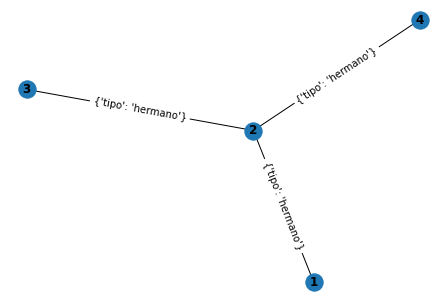

In [8]:
draw_node_neighbors(graph, 2)

Node: 3
Connections: [(3, 2, {'tipo': 'hermano'}), (3, 1, {'tipo': 'hermano'}), (3, 4, {'tipo': 'hermano'})]



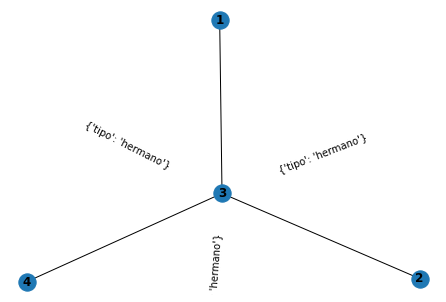

In [9]:
draw_node_neighbors(graph, 3)

In [10]:
draw_node_neighbors(graph, 5)

Node 5 does not exist.


In [11]:
# Obtengo un dict
node_link_data = json_graph.node_link_data(graph)

In [12]:
import json

# este diccionario se convierte en JSON haciendo json.dump (para guardar a un archivo) o json.dumps para obtener 
# el string resultante. Un JSON siempre es un str
print(f'Python dict: {node_link_data}')
# El objeto original es un dict
print(type(node_link_data))
print()

# Lo convierto a JSON
json_data = json.dumps(node_link_data)
print(f'JSON dict: {json_data}')
# Al ser json, el type es un str
type(json_data)

Python dict: {'directed': False, 'multigraph': False, 'graph': {}, 'nodes': [{'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}], 'links': [{'tipo': 'hermano', 'source': 1, 'target': 2}, {'tipo': 'hermano', 'source': 1, 'target': 3}, {'tipo': 'hermano', 'source': 1, 'target': 4}, {'tipo': 'hermano', 'source': 2, 'target': 3}, {'tipo': 'hermano', 'source': 2, 'target': 4}, {'tipo': 'hermano', 'source': 3, 'target': 4}]}
<class 'dict'>

JSON dict: {"directed": false, "multigraph": false, "graph": {}, "nodes": [{"id": 1}, {"id": 2}, {"id": 3}, {"id": 4}], "links": [{"tipo": "hermano", "source": 1, "target": 2}, {"tipo": "hermano", "source": 1, "target": 3}, {"tipo": "hermano", "source": 1, "target": 4}, {"tipo": "hermano", "source": 2, "target": 3}, {"tipo": "hermano", "source": 2, "target": 4}, {"tipo": "hermano", "source": 3, "target": 4}]}


str

In [13]:
# Para convertir de JSON a objetos de python se usa la inversa json.load (desde un archivo) o json.loads
# (desde un str). Esto nos vuelve a convertir el JSON a objetos de python. En este caso, era un diccionario,
# pero un JSON puede interpretarse como una lista, o un string, o un int/float... todos son objetos JSON válidos
back_to_dict = json.loads(json_data)
print(type(back_to_dict))

<class 'dict'>


In [14]:
# Otros ejemplos de conversión de JSON en python
# En este caso estamos trabajando con un string
my_string = 'sample string'

json_string = json.dumps(my_string)

print(f'JSON string: {json_string}')
     
print(type(json_string))
print()

new_string = json.loads(json_string)
print(f'Python string: {new_string}')
print(type(new_string))

JSON string: "sample string"
<class 'str'>

Python string: sample string
<class 'str'>


In [15]:
my_list = [1, 2, 3, 'fff', 'ddd']
json_list = json.dumps(my_list)
print(f'JSON list: {json_list}')
print(type(json_list))
print()

python_list = json.loads(json_list)
print(f'Python list: {python_list}')
print(type(python_list))

JSON list: [1, 2, 3, "fff", "ddd"]
<class 'str'>

Python list: [1, 2, 3, 'fff', 'ddd']
<class 'list'>


In [16]:
my_int = 5
json_int = json.dumps(my_int)

print(f'JSON int: {json_int}')
# Incluso un entero puede ser convertido a json. Cuando se convierte a JSON pasa a ser un string
print(type(json_int))
print()

python_int = json.loads(json_int)
print(f'Python int: {python_int}')
# Al convertir de vuelta a un tipo nativo de python usando json.loads se vuelve a convertir en int
print(type(python_int))

JSON int: 5
<class 'str'>

Python int: 5
<class 'int'>


In [17]:
# Esta función recibe el resultado de json_graph.node_link_data(). Este objeto es un diccionario de python.
# Antes de llamar a la función, debería hacerse un json.loads() o json.load8) para obtener el diccionario
# a partir del JSON


def draw_node_neighbors_from_node_link_data(node_link_data, node):
    # Uso link.copy() porque más adelante se hace link.pop() y en caso de no hacer una copia, se modifica el objeto
    # original node_link_data que está fuera de la función. Puede ocasionar algún error si no se crea una copia y 
    # ese objeto se utiliza para seguir trabajando más adelante.
    node_links = [link.copy() for link in node_link_data['links'] if link['source'] == node]
    if not node_links:
        print(f'Node {node} does not have any links.')
        return

    # Remove source from links (source is not needed, we already know the node)
    for link in node_links:
        link.pop('source')

    # Create neighbors_dict from node_links
    node_neighbors_dict = {link.pop('target'): link for link in node_links}

    node_neighbors_graph = nx.Graph()
    edges_list = [(node, neighbor, relations) for neighbor, relations in node_neighbors_dict.items()]
    node_neighbors_graph.add_edges_from(edges_list)

    print(f'Node: {node}')
    print(f'Connections: {edges_list}')
    print()

    plt.figure()
    pos = nx.spring_layout(node_neighbors_graph)
    nx.draw(node_neighbors_graph, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(node_neighbors_graph, pos=pos)
    plt.show()


Node: 1
Connections: [(1, 2, {'tipo': 'hermano'}), (1, 3, {'tipo': 'hermano'}), (1, 4, {'tipo': 'hermano'})]



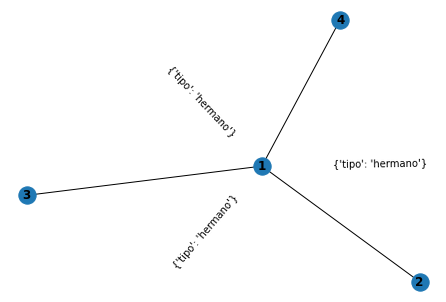

In [18]:
draw_node_neighbors_from_node_link_data(node_link_data, 1)

In [19]:
# Otra opción puede ser modificar la función para que obtenga el diccionario a partir del json. Dejé comentadas
# un par de líneas que usarían un parámetro from_json (Falso por defecto), que en caso de ser verdadero, hace
# el json.loads dentro de la función. La llamé draw_node_neighbors_from_node_link_data_2 para que no haya problemas
# con draw_node_neighbors_from_node_link_data, pero es un mal nombre ponerle un _2 al final.

def draw_node_neighbors_from_node_link_data_2(node_link_data, node, from_json=False):
    if from_json:
        node_link_data = json.loads(node_link_data)
    
    # Uso link.copy() porque más adelante se hace link.pop() y en caso de no hacer una copia, se modifica el objeto
    # original node_link_data que está fuera de la función. Puede ocasionar algún error si no se crea una copia y 
    # ese objeto se utiliza para seguir trabajando más adelante.
    node_links = [link.copy() for link in node_link_data['links'] if link['source'] == node]
    if not node_links:
        print(f'Node {node} does not have any links.')
        return

    # Remove source from links (source is not needed, we already know the node)
    for link in node_links:
        link.pop('source')

    # Create neighbors_dict from node_links
    node_neighbors_dict = {link.pop('target'): link for link in node_links}

    node_neighbors_graph = nx.Graph()
    edges_list = [(node, neighbor, relations) for neighbor, relations in node_neighbors_dict.items()]
    node_neighbors_graph.add_edges_from(edges_list)

    print(f'Node: {node}')
    print(f'Connections: {edges_list}')
    print()

    plt.figure()
    pos = nx.spring_layout(node_neighbors_graph)
    nx.draw(node_neighbors_graph, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(node_neighbors_graph, pos=pos)
    plt.show()

Node: 1
Connections: [(1, 2, {'tipo': 'hermano'}), (1, 3, {'tipo': 'hermano'}), (1, 4, {'tipo': 'hermano'})]



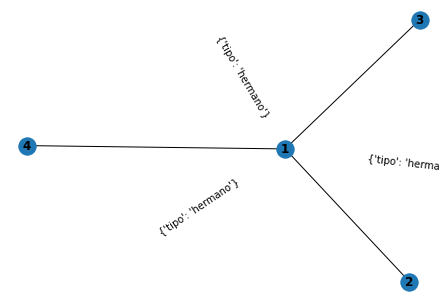

In [20]:
# Primero, usamos esta nueva función con el mismo objeto anterior, dejando el from_json = False
draw_node_neighbors_from_node_link_data_2(node_link_data, 1)

Node: 1
Connections: [(1, 2, {'tipo': 'hermano'}), (1, 3, {'tipo': 'hermano'}), (1, 4, {'tipo': 'hermano'})]



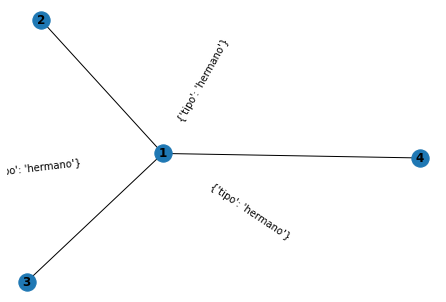

In [21]:
# En cambio ahora lo convertimos a JSON primero y seteamos el from_json = True al llamar a la función
json_node_link_data = json.dumps(node_link_data)
draw_node_neighbors_from_node_link_data_2(json_node_link_data, 1, True)